<a href="https://colab.research.google.com/github/VarvaraSharutina/bioinfo/blob/main/bioinf_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Математические методы биоинформатики

### Home work 1. Описательная статистика в Python

### Задание.

Загрузите из файла *heart.csv* данные о сердечных заболеваниях.

Признаки (переменные):  
- age  
- sex (1 - Male, 0 - Female)  
- cp - chest pain type (4 values)  
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 0 = normal; 1 = fixed defect; 2 = reversable defect

Удалите из датафрейма столбец target и в дальнейшем анализируйте датафрейм без него.

**Ответьте на следующие вопросы и выподните следующие задания:**  

1) Сколько образцов (объектов) содержит данный датасет?  

2) Сколько атрибутов (признаков) содержит данный датасет?  

3) Опишите тип каждого признака: числовой (дискретный/непрерывный), категориальный (номинальный/бинарный/ординальный).

4) Вычислите сколько мужчин/женщин в датасете?  

5) Вычислите описательные статистики для количественных признаков (среднее значение, медиана, мода (только для дискретных переменных), размах, дисперсия, среднеквадратичное отклонение, 1й/2й/3й квартили, межквартильный размах) с помощью numpy или statistics. Создайте единую функцию, которая вычислит все эти значения.

6) Для категориальных признаков определите возможные категории и число объектов, принадлежащих к каждой категории. Для каждого признака постройте соответствующую столбчатую диаграмму. Подпишите оси.

7) Постройте гистограммы для признаков age, trestbps, chol, thalach, oldpeak. Расположите подграфики для гистограмм в одну линию. Подпишите оси каждой гистограммы. Гистограммы должны быть разных цветов.

8) Постройте "ящики с усами" для признаков age, trestbps, chol, thalach, oldpeak. Подпишите оси.

9) Постройте на одном графике две кривые PDF (probability density function) для признака chol. Одна PDF для мужчин, другая - для женщин. Подпишите оси, добавьте легенду.  

10) Сгруппируйте данные по полу и вычислите для каждой группы среднее значение признака chol, применив к датафрейму функцию аггрегации. Изобразите результаты в виде столбчатой диаграммы, где столбцы должены соответствовать полу, а высота столбцов -  ссоответствующим средним значениям признака chol. Добавьте к каждому столбцу планку погрешности, отражающую среднеквадратичное отклонение.  

11) Сделайте различные выводы относительно рассматриваемого датасета.

In [20]:
import pandas as pd
url = "https://raw.githubusercontent.com/VarvaraSharutina/bioinfo/main/heart%20(1).csv"
data_raw = pd.read_csv(url)

In [21]:
data_raw = data_raw.drop('target', axis=1)

In [22]:
data_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
data_raw.shape

(303, 13)

In [24]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


1. Данный датасет содержит 303 образца

2. Данный датасет модержит 13 признаков

3. Типы признаков:

*   age - числовой (дискретный)
*   sex - категориальный (бинарный)
*   cp - категориальный (ординальный)
*   trestbps - числовой (дискретный)
*   chol - числовой (дискретный)
*   fbs - категориальный (бинарный)
*   restecg - категориальный (номинальный)
*   thalach - числовой (дискретный)
*   exang - категориальный (бинарный)
*   oldpeak - числовой (непрерывный)
*   slope - категориальный (ординальный)
*   ca - числовой (дискретный)
*   thal - категориальный (номинальный)




   

In [25]:
sex_counts = data_raw['sex'].value_counts()
print(f"Мужчины (1): {sex_counts.get(1, 0)}")
print(f"Женщины (0): {sex_counts.get(0, 0)}")

Мужчины (1): 207
Женщины (0): 96


4. В датасете мужчин 207, женщин 96

5. Описательная статистика для количественных признаков

In [26]:
import numpy as np
from statistics import mode, StatisticsError

def calculate_statistics(data, column_name):
  new_data = data.dropna()
  stats = {
    'признак': column_name,
    'количество наблюдений': len(new_data),
    'среднее значение': np.mean(new_data),
    'медиана': np.median(new_data),
    'минимум': np.min(new_data),
    'максимум': np.max(new_data),
    'размах': np.max(new_data) - np.min(new_data),
    'дисперсия': np.var(new_data, ddof=1),
    'среднеквадратичное отклонение': np.std(new_data, ddof=1),
    '1-й квантиль': np.quantile(new_data, 0.25),
    '2-й квантиль': np.quantile(new_data, 0.50),
    '3-й квантиль': np.quantile(new_data, 0.75),
    'межквантильный размах': np.quantile(new_data, 0.75)-np.quantile(new_data, 0.25)
}

  if column_name !='oldpeak':
    try:
      stats['мода'] = mode(new_data)
    except StatisticsError:
      stats['мода'] = 'несколько мод'
    except Exception:
      stats['мода'] = 'ошибка'

  return stats

def print_statistics(stats):
    print(f"\nСтатистика для признака: {stats['признак']}")
    print("-" * 40)
    for key, value in stats.items():
        if key != 'признак':
            if isinstance(value, float):
                print(f"{key:30}: {value:.4f}")
            else:
                print(f"{key:30}: {value}")
    print("-" * 40)

for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  stats = calculate_statistics(data_raw[col], col)
  print_statistics(stats)


Статистика для признака: age
----------------------------------------
количество наблюдений         : 303
среднее значение              : 54.3663
медиана                       : 55.0000
минимум                       : 29
максимум                      : 77
размах                        : 48
дисперсия                     : 82.4846
среднеквадратичное отклонение : 9.0821
1-й квантиль                  : 47.5000
2-й квантиль                  : 55.0000
3-й квантиль                  : 61.0000
межквантильный размах         : 13.5000
мода                          : 58
----------------------------------------

Статистика для признака: trestbps
----------------------------------------
количество наблюдений         : 303
среднее значение              : 131.6238
медиана                       : 130.0000
минимум                       : 94
максимум                      : 200
размах                        : 106
дисперсия                     : 307.5865
среднеквадратичное отклонение : 17.5381
1-й квантил

6. Анализ категориальных признаков


Анализ признака: sex
------------------------------
         0 :    96 раз
         1 :   207 раз


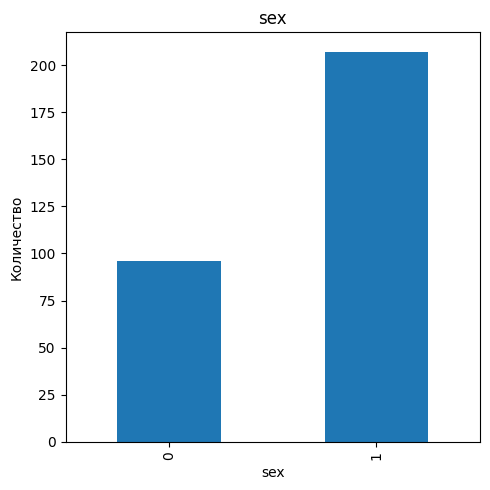


Анализ признака: cp
------------------------------
         0 :   143 раз
         1 :    50 раз
         2 :    87 раз
         3 :    23 раз


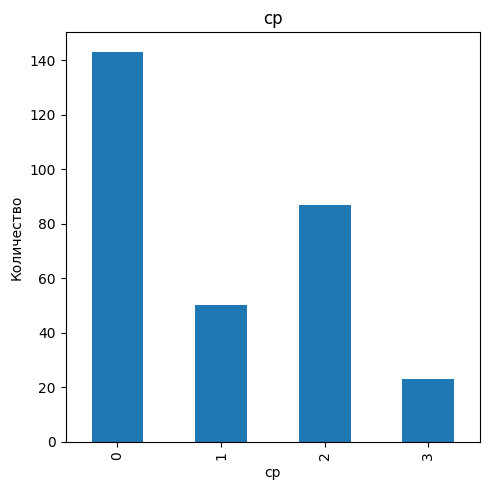


Анализ признака: fbs
------------------------------
         0 :   258 раз
         1 :    45 раз


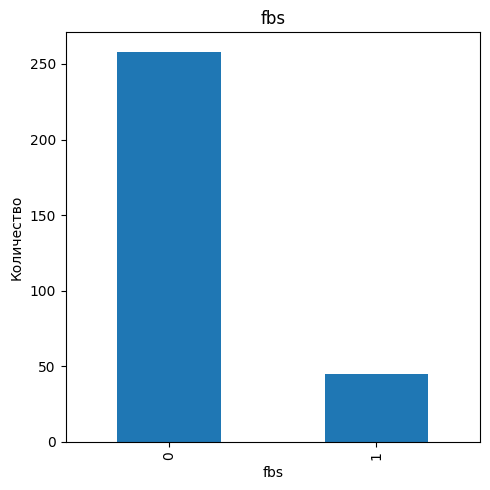


Анализ признака: restecg
------------------------------
         0 :   147 раз
         1 :   152 раз
         2 :     4 раз


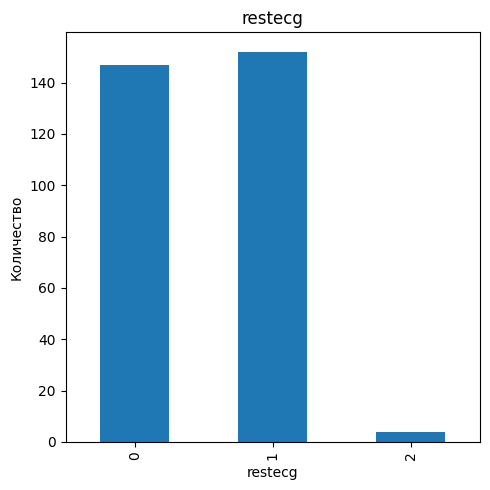


Анализ признака: exang
------------------------------
         0 :   204 раз
         1 :    99 раз


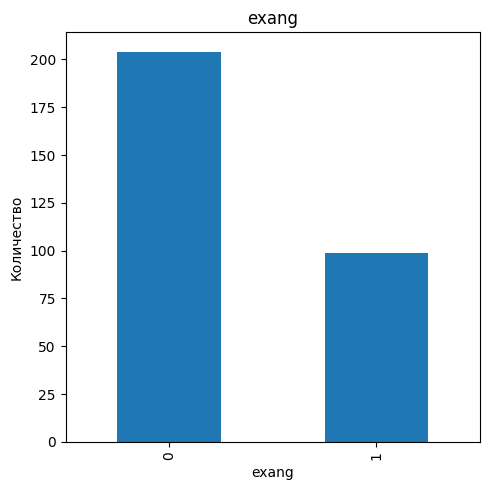


Анализ признака: slope
------------------------------
         0 :    21 раз
         1 :   140 раз
         2 :   142 раз


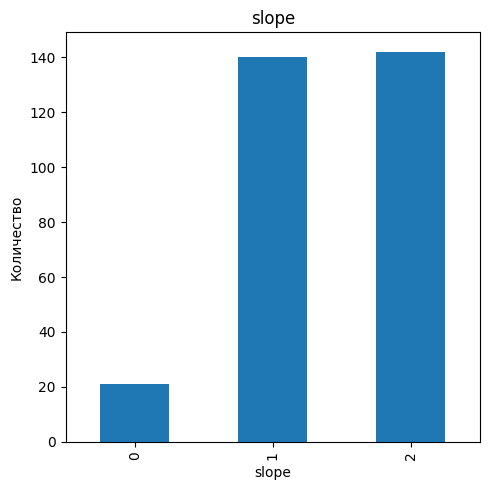


Анализ признака: thal
------------------------------
         0 :     2 раз
         1 :    18 раз
         2 :   166 раз
         3 :   117 раз


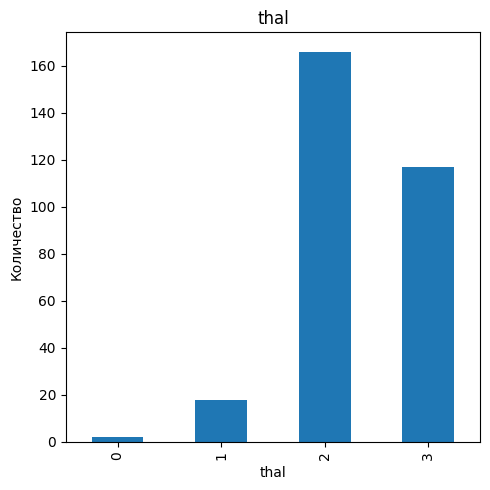

In [36]:
import matplotlib.pyplot as plt

def categorical_analysis(data, column_name):
    print(f"\nАнализ признака: {column_name}")
    print("-" * 30)
    value_counts = data[column_name].value_counts().sort_index()
    for value, count in value_counts.items():
        print(f"{value:10} : {count:5} раз")

    plt.figure(figsize=(5, 5))
    data[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()

categorical_analysis(data_raw, 'sex')
categorical_analysis(data_raw, 'cp')
categorical_analysis(data_raw, 'fbs')
categorical_analysis(data_raw, 'restecg')
categorical_analysis(data_raw, 'exang')
categorical_analysis(data_raw, 'slope')
categorical_analysis(data_raw, 'thal')

7. Гистограммы для признаков age, trestbps, chol, thalach, oldpeak

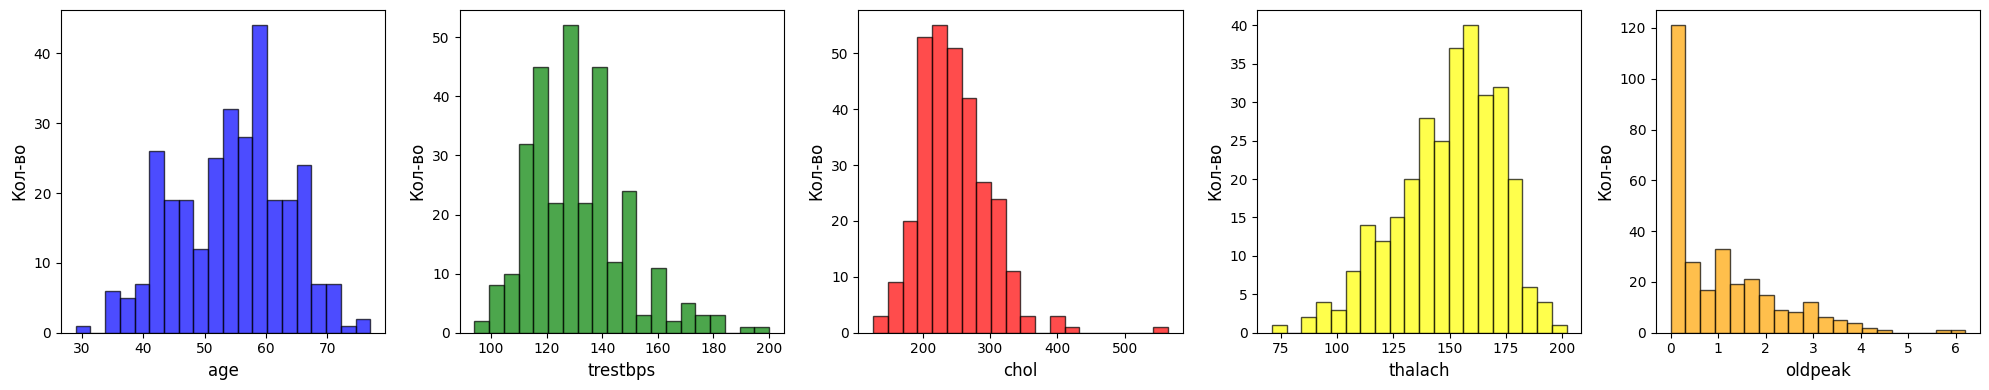

In [28]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
colors = ['blue', 'green', 'red', 'yellow', 'orange']

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, (columns, color) in enumerate(zip(columns, colors)):
    axes[i].hist(data_raw[columns].dropna(), bins=20, color=color,
                 edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(columns, fontsize=12)
    axes[i].set_ylabel('Кол-во', fontsize=12)

plt.tight_layout()
plt.show()

8. Ящики с усами для признаков age, trestbps, chol, thalach, oldpeak

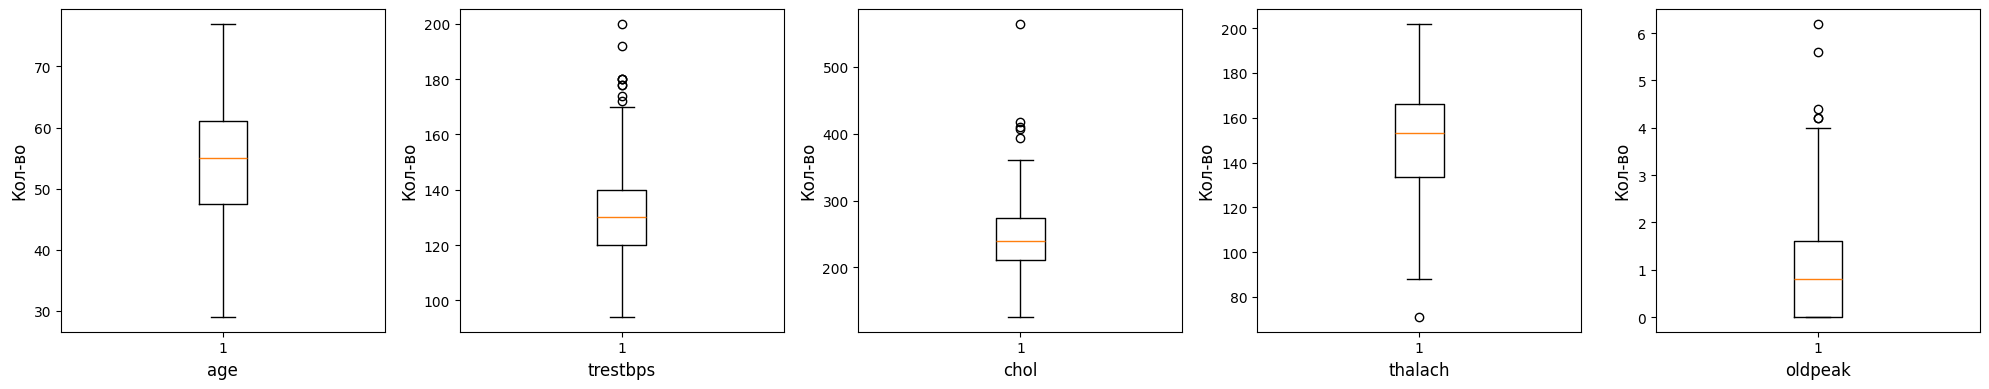

In [29]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(columns):
    axes[i].boxplot(data_raw[col].dropna())
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Кол-во', fontsize=12)

plt.tight_layout()
plt.show()


9. Две кривые PDF (probability density function) для признака chol. Одна PDF для мужчин, другая - для женщин

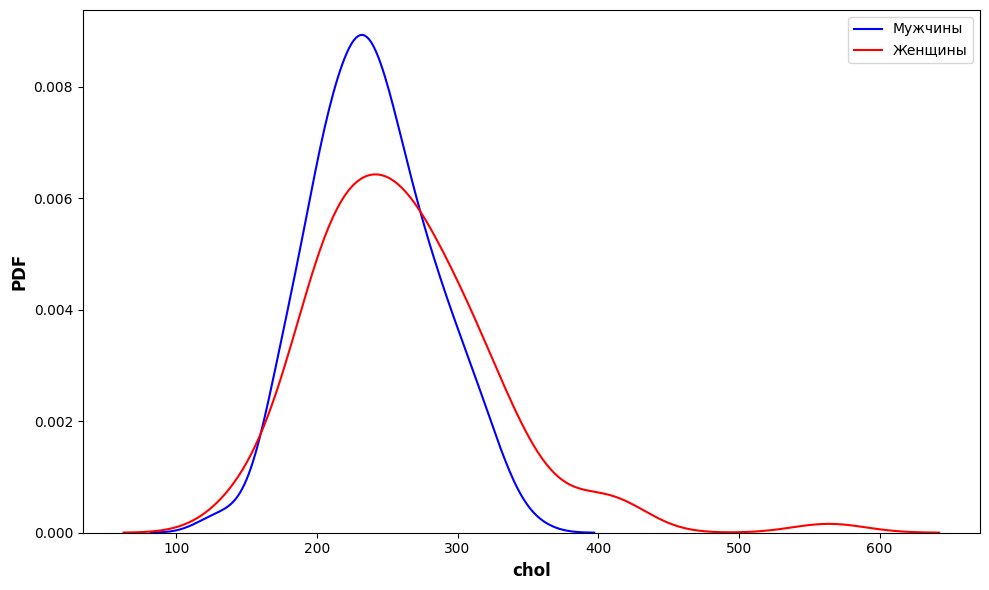

In [30]:
from scipy import stats
import seaborn as sns

chol_male = data_raw[data_raw['sex'] == 1]['chol'].dropna()
chol_female = data_raw[data_raw['sex'] == 0]['chol'].dropna()

plt.figure(figsize=(10, 6))

sns.kdeplot(chol_male, label='Мужчины', color='blue')
sns.kdeplot(chol_female, label='Женщины', color='red')

plt.xlabel('chol', fontsize=12, fontweight='bold')
plt.ylabel('PDF', fontsize=12, fontweight='bold')

plt.legend()

plt.tight_layout()
plt.show()

10. Столбчатые диаграммы, где столбцы должны соответствовать полу, а высота столбцов - ссоответствующим средним значениям признака chol (добавьте к каждому столбцу планку погрешности, отражающую среднеквадратичное отклонение)

Статистика уровня холестерина по полу:
--------------------------------------------------
sex_label  count       mean       std
  Женщины     96 261.302083 65.088946
  Мужчины    207 239.289855 42.782392


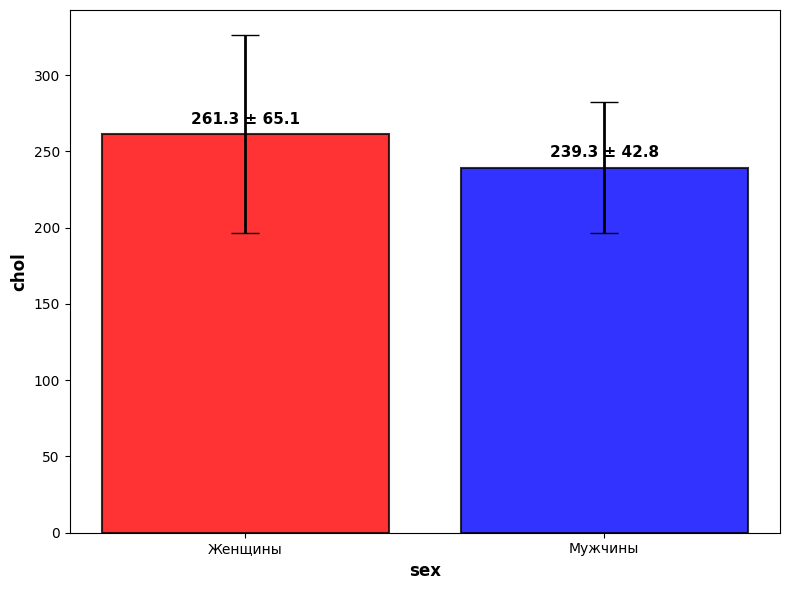

In [37]:
grouped_stats = data_raw.groupby('sex')['chol'].agg(['mean', 'std', 'count']).reset_index()
grouped_stats['sex_label'] = grouped_stats['sex'].map({0: 'Женщины', 1: 'Мужчины'})

print("Статистика уровня холестерина по полу:")
print("-"*50)
print(grouped_stats[['sex_label', 'count', 'mean', 'std']].to_string(index=False))

plt.figure(figsize=(8, 6))

bars = plt.bar(grouped_stats['sex_label'],
               grouped_stats['mean'],
               yerr=grouped_stats['std'],  # планки погрешности
               capsize=10,
               color=['red', 'blue'],
               edgecolor='black',
               linewidth=1.5,
               alpha=0.8,
               error_kw={'elinewidth': 2, 'ecolor': 'black'})  # настройка планок

for bar, mean, std in zip(bars, grouped_stats['mean'], grouped_stats['std']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{mean:.1f} ± {std:.1f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('sex', fontsize=12, fontweight='bold')
plt.ylabel('chol', fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()

11. Выводы

В данном датасете содержится 303 объекта, то есть исследование проводилось над 303 пациентами, и учитывались 13 показателей (признаков) этих пациентов. В результате изучения этого датасета можно заметить, что среди исследуемых пациентов больше мужчин (женщин 96, мужчин 207), средний возраст объектов составляет 55 лет (есть сдвиг в сторону старшего возраста).

По построенным ящикам с усами можно сказать, что много выбросов имеет trestbps, а также выбросы имеют chol и oldpeak.

Из пунктов 9 и 10 увидим различия между плотностями вероятностями для признака chol у мужчин и женщин, по этим графикам и гистограммам можно сделать вывод, что средний уровень холестерина у мужчин ниже, чем у женщин, также как и его среднеквадратичное отклонение, также видим, что разброс значений chol у женщин более широкий (несмотря на то, что в исследовании их участвовало меньше почти в 2 раза).